In [7]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# Define constants
IMAGE_SIZE = (206, 206)
BATCH_SIZE = 32
DATA_DIR = 'dataset'  # Make sure this directory contains subdirectories with images

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation split
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20
)

In [4]:
# Training Data
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation Data
validation_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [5]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(206, 206, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # 4 classes: Normal, Diabetic Retinopathy, Cataract, Glaucoma
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:
# Create the model
model = create_model()

# Summary of the model
model.summary()


c:\Users\joele\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 204, 204, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 102, 102, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,437,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,531,076 (36.36 MB)

 Trainable params: 9,531,076 (36.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)

# Save the model
model.save('eye_disease_classifier.h5')


Epoch 1/25


c:\Users\joele\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.3694 - loss: 1.3621 - val_accuracy: 0.4352 - val_loss: 1.2001
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 101s 927ms/step - accuracy: 0.5360 - loss: 1.0599 - val_accuracy: 0.4578 - val_loss: 1.1524
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 105s 961ms/step - accuracy: 0.6084 - loss: 0.9568 - val_accuracy: 0.4400 - val_loss: 1.2387
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.6891 - loss: 0.8085 - val_accuracy: 0.4673 - val_loss: 1.2803
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 100s 920ms/step - accuracy: 0.7170 - loss: 0.7295 - val_accuracy: 0.4578 - val_loss: 1.2759
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 109s 996ms/step - accuracy: 0.7205 - loss: 0.7104 - val_accuracy: 0.4697 - val_loss: 1.2316
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.7175 - loss: 0.6950 - val_accuracy: 0.5042 - val_loss: 1.1840
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 104s 957ms/step - accuracy: 0.7403 - loss: 0.6687 - val_

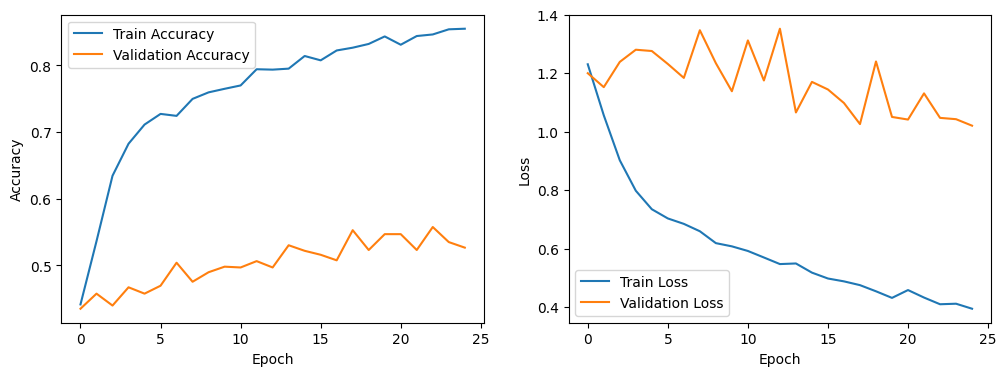

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 351ms/step - accuracy: 0.5098 - loss: 1.0663
Validation Accuracy: 52.68%


# Interpretation of Results

The training accuracy shows a steady increase, reaching around 85%, indicating that the model is learning the training data well. However, the validation accuracy fluctuates and achieves around 52.68%. This fluctuation and the gap between training and validation accuracy suggest that the model may be overfitting to the training data. Overfitting occurs when the model learns the training data, including noise, too well and fails to generalize to new, unseen data.


27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 543ms/step


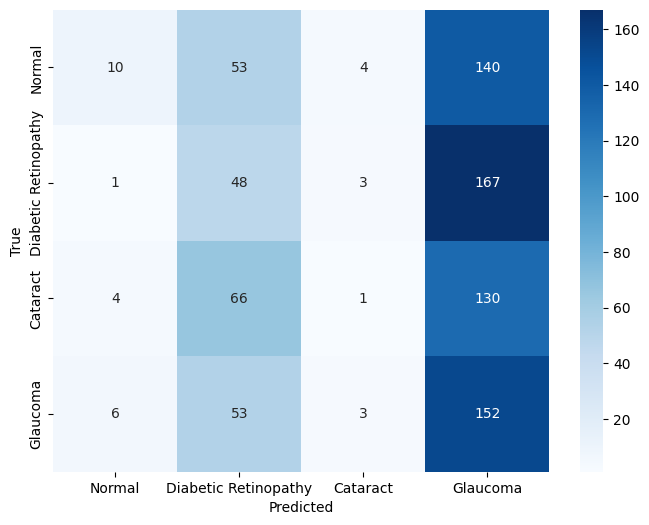

                      precision    recall  f1-score   support

              Normal       0.48      0.05      0.09       207
Diabetic Retinopathy       0.22      0.22      0.22       219
            Cataract       0.09      0.00      0.01       201
            Glaucoma       0.26      0.71      0.38       214

            accuracy                           0.25       841
           macro avg       0.26      0.25      0.17       841
        weighted avg       0.26      0.25      0.18       841



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
cm_plot_labels = ['Normal', 'Diabetic Retinopathy', 'Cataract', 'Glaucoma']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(validation_generator.classes, y_pred, target_names=cm_plot_labels))


In [16]:
# Define constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 128
DATA_DIR = 'dataset'  # Make sure this directory contains subdirectories with images

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation split
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20
)

# Training Data
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation Data
validation_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [20]:
from tensorflow.keras.regularizers import l2

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)


In [22]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Save the new model
model.save('eye_disease_classifier.h5')


Epoch 1/50


c:\Users\joele\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 286s 10s/step - accuracy: 0.3002 - loss: 2.0140 - val_accuracy: 0.4376 - val_loss: 1.4183
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 284s 10s/step - accuracy: 0.4782 - loss: 1.3492 - val_accuracy: 0.4364 - val_loss: 1.3662
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 238s 8s/step - accuracy: 0.5301 - loss: 1.2262 - val_accuracy: 0.4851 - val_loss: 1.2888
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 237s 8s/step - accuracy: 0.6192 - loss: 1.0865 - val_accuracy: 0.4471 - val_loss: 1.6511
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 207s 7s/step - accuracy: 0.6751 - loss: 0.9934 - val_accuracy: 0.4388 - val_loss: 1.6734
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 178s 6s/step - accuracy: 0.6742 - loss: 0.9340 - val_accuracy: 0.4590 - val_loss: 1.4658
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 170s 6s/step - accuracy: 0.6862 - loss: 0.9017 - val_accuracy: 0.4507 - val_loss: 1.3757
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 175s 6s/step - accuracy: 0.6989 - loss: 0.8636 - val_accuracy: 0.4530 - val_loss: 

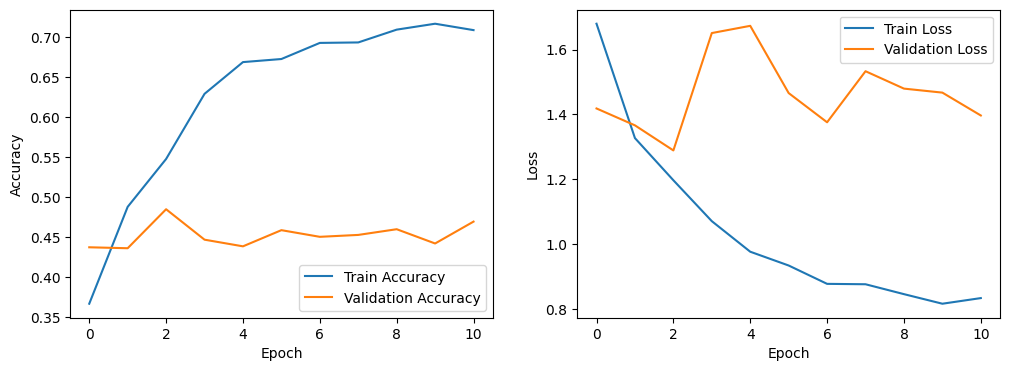

In [23]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


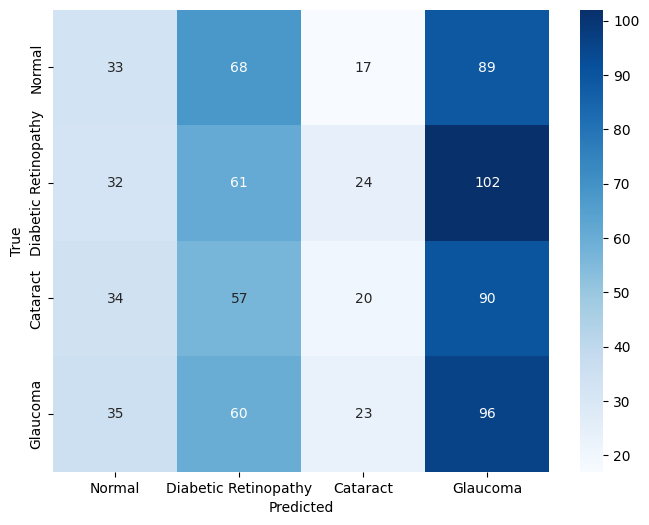

                      precision    recall  f1-score   support

              Normal       0.25      0.16      0.19       207
Diabetic Retinopathy       0.25      0.28      0.26       219
            Cataract       0.24      0.10      0.14       201
            Glaucoma       0.25      0.45      0.32       214

            accuracy                           0.25       841
           macro avg       0.25      0.25      0.23       841
        weighted avg       0.25      0.25      0.23       841



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
cm_plot_labels = ['Normal', 'Diabetic Retinopathy', 'Cataract', 'Glaucoma']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(validation_generator.classes, y_pred, target_names=cm_plot_labels))
